#Spam Email Classification
##Machine Learning HW 3
###Jenna Swartz

In [40]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Part A

A1 -- *Describe the importance of training and test data.  Why do we separate data into these subsets?*

It is important to separate data in training and test data so we can analyze a model's predictive power by fitting/training it on the training data and testing it on testing data. This helps to avoid overfitting of the model, because it prevents the model from just fitting to one group of data (which could capture trends in the data but also noise in that group of data). Instead, the model learns patterns and relationships and tries to minimize error from the training data and we make sure the model generalizes well to new data that it has not seen before.

A2 -- *What is k-fold cross validation and what do we use it for?*

K-fold cross validation is used to maximize the training and testing capacity of the dataset we have by taking different "cuts" every time we split the data up into training and test data. In other words, we take k-1 folds for training and the other 1 fold for testing each time, but we rotate which fold is tested each time so eventually, we are able to test each of the k folds as the testing data. Technically the training and testing sets are different each time, so in a way, so we are using slightly different testing and training sets each time which allows us to compare performance between the different rounds/splits and we can also average the results from all these splits.

A3 -- *How is k-fold cross validation different from stratified k-fold cross validation?*

Stratified k-fold cross validation is appropriate when we have "classes" in our dataset that we know about, and this technique is especially helpful when the amount of data in each class is uneven. For example, let's say we have 80 men and 20 women in our dataset. If we just used normal cross validation, we might be accidentally using all/most the men for our training dataset and all/most the women for our testing dataset, which could result in very imbalanced split and poor performance on our testing data. Instead, with stratified cross validation, we would randomnly select, say, 5 women and 20 men for each group split so we maintain the same proportion of each class that we have in the original dataset to test and train on a more accurate subset of the broader dataset.

A4 -- *Name the 4 types of supervised learning models that we have learned thus far that are used to predict categorical dependent variables like whether an email is labeled “spam” or “not spam.”*

KNN, Logistic Regression (Both Penalized and Regular), Support Vector Machines, Decision Trees/Random Forests

A5 -- *Name the 3 types of supervised learning models that we have learned thus far that are used to predict continuous dependent variables like test scores.*

KNN, Linear Regression (both penalized and regular), and Decision Trees/Random Forests

## Part B

B1 -- *Import the spam dataset and print the first six rows.*

In [41]:
df = pd.read_csv("/content/spam_dataset.csv")
df.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


B2 -- *Read through the documentation of the original dataset here: http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.namesLinks to an external site.. The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?*

I think frequency of the word "free" (word_freq_free) will be important in predicting spam. In my experience, spam emails offer enticing things like a "free cruise" or "free car" in order to get people to click on their links or offer up personal information.

I also think frequency of exclamation marks (char_freq_!) will be important in predictimg spam because for similar reasons, the existence of many "!"s can help capture the attention of recipients to click on the email and entice them to participate.

Lastly, I think the average run length of capital letters (capital_run_length_average) will help predict spam for the same readers - to catch the reader's attention and convey a sense of urgency.

B3 -- *Visualize the univariate distribution of each of the variables in the previous question.*

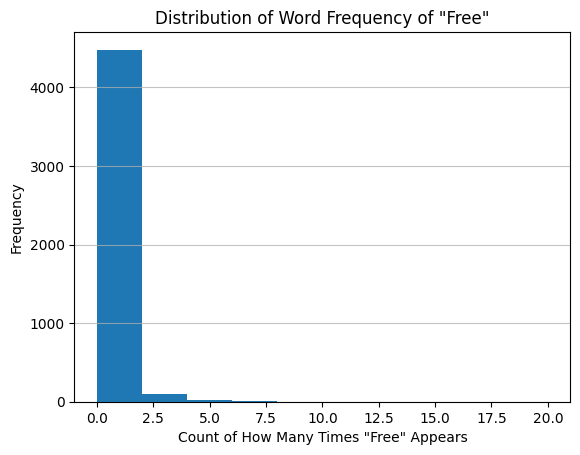

In [42]:
#visualizing word_freq_free
plt.hist(df['word_freq_free:'])
plt.title('Distribution of Word Frequency of "Free"')
plt.xlabel('Count of How Many Times "Free" Appears')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

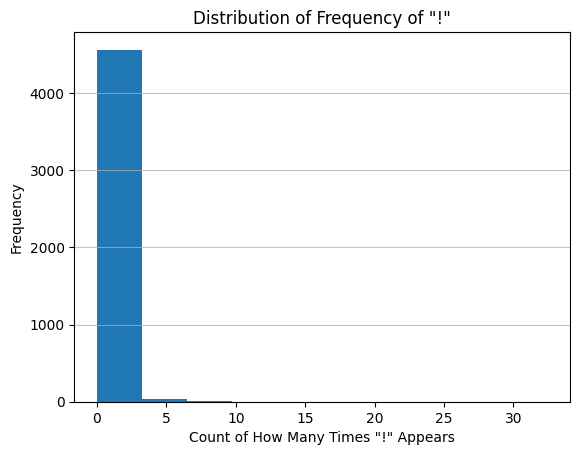

In [43]:
#visualizing char_freq_!
plt.hist(df['char_freq_!:'])
plt.title('Distribution of Frequency of "!"')
plt.xlabel('Count of How Many Times "!" Appears')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

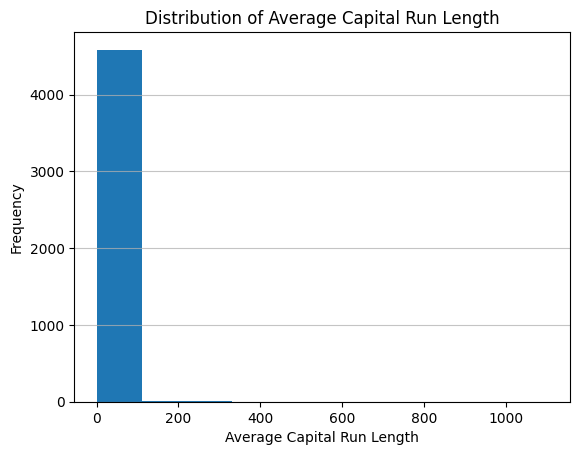

In [44]:
#visualizing capital_run_length_average:
plt.hist(df['capital_run_length_average:'])
plt.title('Distribution of Average Capital Run Length')
plt.xlabel('Average Capital Run Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

B4 -- *Choose one model from Part A Question 4.  Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam". Run the model and evaluate prediction error using k-fold cross-validation. Describe why you chose any particular parameters for your model (e.g., if you used KNN how did you decide to choose a specific value for k).*

I will use KNN for this question.

In [45]:
#First I will split the data into training and test subsets.
y = df['spam']  # Target variable (spam)
X = df[['word_freq_free:', 'char_freq_!:', 'capital_run_length_average:']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
param_grid_knn = {
    'n_neighbors': list(range(1, 16))  #setting range of neighbors param
}

In [47]:
from sklearn.metrics import f1_score, accuracy_score, classification_report

In [48]:
# Grid search for KNN
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring = 'f1')
grid_search_knn.fit(X_train, y_train)

# Best parameters and cross-validation score
print("\nBest parameters for KNN:", grid_search_knn.best_params_)
print("Mean cross-validation F1 score for KNN: {:.3f}".format(np.mean(grid_search_knn.cv_results_['mean_test_score'])))

# Make predictions on the test set
y_pred = grid_search_knn.predict(X_test)

# Calculate and print F1 score and accuracy on the test set
f1 = f1_score(y_test, y_pred)

print("F1 Score on test set: {:.3f}".format(f1))



Best parameters for KNN: {'n_neighbors': 9}
Mean cross-validation F1 score for KNN: 0.784
F1 Score on test set: 0.800


I used gridsearchcv to tune my parameters (which ultimately found that using 9 nearest neighbors for classification was optimal for my model). I used F1 as scoring metric for the grid search (as this metric effectively balances precision and recall and is best for classification models). The average F1 score from the 5-fold cross-validation on the training set is .784 which shows the model is performing fairly well but of course could be better. When we compare our predicted y values (spam or not spam) based on the test set's x variable values to the actual y values of our test set, we get a F1 score of .8. Since these two F1 scores are similar, it shows that the model didn't overfit to the training data and instead generalizes pretty well to new data (in fact, performs slightly better on the test data).

Next, I'll try the model with standard scaling.

In [49]:
# Now I'll try the same model with standard scaling
scaler2 = StandardScaler()
X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)

In [50]:
# Grid search for KNN
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring = 'f1')
grid_search_knn.fit(X_train_scaled, y_train)

# Best parameters and cross-validation score
print("\nBest parameters for KNN:", grid_search_knn.best_params_)
print("Mean cross-validation F1 score for KNN: {:.3f}".format(np.mean(grid_search_knn.cv_results_['mean_test_score'])))

# Make predictions on the test set
y_pred = grid_search_knn.predict(X_test_scaled)

# Calculate and print F1 score and accuracy on the test set
f1 = f1_score(y_test, y_pred)

print("F1 Score on test set: {:.3f}".format(f1))



Best parameters for KNN: {'n_neighbors': 9}
Mean cross-validation F1 score for KNN: 0.789
F1 Score on test set: 0.798


Standard scaling for this KNN model slightly improved mean cross validation F1 score on the training set but slightly worsened the test set score, so I don't think scaling helped much here.

B5 -- *Repeat the previous question but with a different model from Part A Question 4.*

Next I will use a logistic regression model (unpenalized).

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, make_scorer

In [52]:
# Define the non-penalized logistic regression model
logreg_no_penalty = LogisticRegression(penalty=None, max_iter=10000)

# Cross-validation using F1 score
cv_scores_no_penalty = cross_val_score(logreg_no_penalty, X_train, y_train, cv=10, scoring='f1')

# Fit the model on the training data
logreg_no_penalty.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_no_penalty.predict(X_test)

# Calculate F1 score on the test set
test_f1 = f1_score(y_test, y_pred)

print("No penalty:")
print("Mean cross-validation F1 score: {:.3f}".format(np.mean(cv_scores_no_penalty)))
print("Test set F1 score: {:.3f}".format(test_f1))

No penalty:
Mean cross-validation F1 score: 0.682
Test set F1 score: 0.698


While the F1 score could definitely be higher here, at least we see consistency. The mean cross validation F1 score (average across the 10 fold cross validation on the training data) is similar to the test set F1 score. Actually, the test set F1 score improves slightly, showing that at least the model didn't overfit on the training data, and instead it generalizes just as well if not better to new data.

Now I will try penalized logistic regression. I will use grid search cv to tell my the optimal parameters for my penalty (i.e. l1 or l2 penalty, and what value of C).

In [53]:
# Define the model (you can try both 'l1' and 'l2' penalties)
logreg_penalized = LogisticRegression(solver='liblinear', max_iter=10000)

# Defining the parameter grid for C values
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(logreg_penalized, param_grid, cv=10, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best parameters from Grid Search:", grid_search.best_params_)

mean_cv_f1_score = np.mean(grid_search.cv_results_['mean_test_score'])

# Make predictions using the best estimator
best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test)

# Calculate F1 score on the test set
test_f1 = f1_score(y_test, y_pred)

print("\nPenalized model with optimal C and penalty:")
# Calculate mean cross-validation F1 score
print("Mean cross-validation F1 score: {:.3f}".format(mean_cv_f1_score))
print("Test set F1 score: {:.3f}".format(test_f1))

Best parameters from Grid Search: {'C': 10, 'penalty': 'l1'}

Penalized model with optimal C and penalty:
Mean cross-validation F1 score: 0.658
Test set F1 score: 0.696


We actually see that even with optimized parameters for the penalized logistic regression, the model performs worse here on average on the training set cross validation F1 scores and performs the same as before on the test data so it doesn't seem like penalized logistic regression is necessary here.

B6 -- *Repeat the previous question but with a different model from Part A Question 4.*

Next I will use a Support Vector Machine model, using grid cv to tune the C parameter.

In [54]:
from sklearn.svm import SVC

# Define the SVM model
svm_model = SVC(kernel='linear')  # Using linear kernel for now

# Define the parameter grid for C values
param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform Grid Search with cross-validation
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=10, scoring='f1')
grid_search_svm.fit(X_train, y_train)

# Best parameters from grid search
print("Best parameters from Grid Search:", grid_search_svm.best_params_)

# Calculate mean cross-validation F1 score
mean_cv_f1_score = np.mean(grid_search_svm.cv_results_['mean_test_score'])

# Make predictions using the best estimator
best_svm = grid_search_svm.best_estimator_
y_pred = best_svm.predict(X_test)

test_f1 = f1_score(y_test, y_pred)

print("\nSVM model with optimal C:")
print("Mean cross-validation F1 score: {:.3f}".format(mean_cv_f1_score))
print("Test set F1 score: {:.3f}".format(test_f1))

Best parameters from Grid Search: {'C': 100}

SVM model with optimal C:
Mean cross-validation F1 score: 0.670
Test set F1 score: 0.739


Grid Search cv tuned the C parameter to be quite high here (100), meaning that this SVM model is strict about misclassifications, leading to narrower margins. The fear with a high C value is that the model might be too strict and overfit on the training data, but that actually doesn't seem to be the case here. It looks like the model performs even better on our test data than on our cross validated training data. Again, the F1 score could be higher but at least it doesn't seem that we're overfitting with this model.

B7 -- *Repeat the previous question but with a different model from Part A Question 4.*

Lastly, I will look at decision tree and random forest classification

In [55]:
from sklearn.tree import DecisionTreeClassifier

# Looking at decision tree first
tree = DecisionTreeClassifier()

# Perform cross-validation to get the F1 score
cv_scores_tree = cross_val_score(tree, X_train, y_train, cv=10, scoring='f1')  # 10-fold cross-validation

# Fit the model on the training data
tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree.predict(X_test)

# Calculate the F1 score on the test set
f1_tree = f1_score(y_test, y_pred_tree)

print("Decision Tree Mean Cross-Validation F1 Score: {:.3f}".format(np.mean(cv_scores_tree)))
print("Decision Tree F1 Score on test set: {:.3f}".format(f1_tree))

Decision Tree Mean Cross-Validation F1 Score: 0.774
Decision Tree F1 Score on test set: 0.783


In [56]:
from sklearn.ensemble import RandomForestClassifier

# Now looking at random forests
rf = RandomForestClassifier()

# Perform cross-validation to get the F1 score
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=10, scoring='f1')  # 10-fold cross-validation

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Calculate the F1 score on the test set
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Mean Cross-Validation F1 Score: {:.3f}".format(np.mean(cv_scores_rf)))
print("Random Forest F1 Score on test set: {:.3f}".format(f1_rf))

Random Forest Mean Cross-Validation F1 Score: 0.804
Random Forest F1 Score on test set: 0.820


Now I'll try tuning a few random forest parameters to see if it makes a difference.

In [57]:
# Set up the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='f1', return_train_score=True)
grid_search_rf.fit(X_train, y_train)

# Best parameters
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

# Mean cross-validation F1 score from the training set
mean_cv_f1_train = np.mean(grid_search_rf.cv_results_['mean_train_score'])
print("Mean cross-validation F1 score on training set: {:.3f}".format(mean_cv_f1_train))

# Initialize the Random Forest classifier with the best parameters
best_rf = grid_search_rf.best_estimator_

# Make predictions on the test set
y_pred_test = best_rf.predict(X_test)

# Calculate F1 score on the test set
test_f1_rf = f1_score(y_test, y_pred_test)

# Print the F1 score for the test set
print("F1 Score on test set: {:.3f}".format(test_f1_rf))

Best parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 2, 'n_estimators': 300}
Mean cross-validation F1 score on training set: 0.912
F1 Score on test set: 0.824


As expected, the random forest model performed better than the simple decision tree model. I tried tuning a few parameters, like n_estimators (number of trees the model generates), max_depth (number of times the internal nodes are split) and min_samples_leaf (which is the minimum number of observations per terminal node) and that seemed to significantly help the F1 score for cross validated averaged model on the training set but did not improve the model's F1 score on the test set very significantly.

B8 -- *Now rerun all 4 models with 3 additional variables that you think will help the prediction accuracy. Did this cause the performance to improve over your previous models?*

Now I will include variables word_freq_money, word_freq_000, and char_freq_$

In [58]:
#redefining x variables now to include 3 additional variables and reproducing training and test data with these variables
y = df['spam']  # Target variable (spam)
X = df[['word_freq_free:', 'char_freq_!:', 'capital_run_length_average:', 'word_freq_money:', 'word_freq_000:', 'char_freq_$:']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [59]:
# Grid search for KNN
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring = 'f1')
grid_search_knn.fit(X_train, y_train)

# Best parameters and cross-validation score
print("\nBest parameters for KNN:", grid_search_knn.best_params_)
print("Mean cross-validation F1 score for KNN: {:.3f}".format(np.mean(grid_search_knn.cv_results_['mean_test_score'])))

# Make predictions on the test set
y_pred = grid_search_knn.predict(X_test)

# Calculate and print F1 score and accuracy on the test set
f1 = f1_score(y_test, y_pred)

print("F1 Score on test set: {:.3f}".format(f1))


Best parameters for KNN: {'n_neighbors': 5}
Mean cross-validation F1 score for KNN: 0.813
F1 Score on test set: 0.849


In [60]:
# Define the non-penalized logistic regression model
logreg_no_penalty = LogisticRegression(penalty=None, max_iter=10000)

# Cross-validation using F1 score
cv_scores_no_penalty = cross_val_score(logreg_no_penalty, X_train, y_train, cv=10, scoring='f1')

# Fit the model on the training data
logreg_no_penalty.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_no_penalty.predict(X_test)

# Calculate F1 score on the test set
test_f1 = f1_score(y_test, y_pred)

print("No penalty:")
print("Mean cross-validation F1 score: {:.3f}".format(np.mean(cv_scores_no_penalty)))
print("Test set F1 score: {:.3f}".format(test_f1))

No penalty:
Mean cross-validation F1 score: 0.774
Test set F1 score: 0.786


In [61]:
# Define the SVM model
svm_model = SVC(kernel='linear')  # Using linear kernel for now

# Define the parameter grid for C values
param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform Grid Search with cross-validation
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=10, scoring='f1')
grid_search_svm.fit(X_train, y_train)

# Best parameters from grid search
print("Best parameters from Grid Search:", grid_search_svm.best_params_)

# Calculate mean cross-validation F1 score
mean_cv_f1_score = np.mean(grid_search_svm.cv_results_['mean_test_score'])

# Make predictions using the best estimator
best_svm = grid_search_svm.best_estimator_
y_pred = best_svm.predict(X_test)

test_f1 = f1_score(y_test, y_pred)

print("\nSVM model with optimal C:")
print("Mean cross-validation F1 score: {:.3f}".format(mean_cv_f1_score))
print("Test set F1 score: {:.3f}".format(test_f1))

Best parameters from Grid Search: {'C': 100}

SVM model with optimal C:
Mean cross-validation F1 score: 0.737
Test set F1 score: 0.811


In [62]:
rf = RandomForestClassifier()

# Perform cross-validation to get the F1 score
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=10, scoring='f1')  # 10-fold cross-validation

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Calculate the F1 score on the test set
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Mean Cross-Validation F1 Score: {:.3f}".format(np.mean(cv_scores_rf)))
print("Random Forest F1 Score on test set: {:.3f}".format(f1_rf))

Random Forest Mean Cross-Validation F1 Score: 0.850
Random Forest F1 Score on test set: 0.855


Yes, overall, adding these extra variables did tend to bump up the F1 score for all the models, adding an extra .03 to .1 to the F1 scores, showing that the variables helped the models' performance while balancing precision and recall.

B9 -- *What is a variable that isn't available in this dataset but you think could increase your final model's predictive power if you had it? Why do you think it would improve your model?*

I think the word frequency of ".com" or some sort of link detection would be helpful to detect spam because I think many spam emails want you to click on a link to the input personal information or to buy something through that link.

I also think something like word frequency of "today" might be helpful because as I explained above, I think spammers want to convey a sense of urgency so the recipient will act without delay and maybe without double checking the validity of the source.